### sklearn.metrics.roc_curve

* sklearn.metrics.roc_curve(_y_true_,  _y_score_,  _*_,  _pos_label=None_,  _sample_weight=None_,  _drop_intermediate=True_)[[source]](https://github.com/scikit-learn/scikit-learn/blob/f3f51f9b6/sklearn/metrics/_ranking.py#L892)[](https://scikit-learn.org/1.1/modules/generated/sklearn.metrics.roc_curve.html?highlight=roc_cur#sklearn.metrics.roc_curve "Permalink to this definition")

Parameters:

**y_true**ndarray of shape (n_samples,)

True binary labels. If labels are not either {-1, 1} or {0, 1}, then pos_label should be explicitly given.

**y_score**ndarray of shape (n_samples,)

Target scores, can either be probability estimates of the positive class, confidence values, or non-thresholded measure of decisions (as returned by “decision_function” on some classifiers).

**pos_label**int or str, default=None

The label of the positive class. When  `pos_label=None`, if  `y_true`  is in {-1, 1} or {0, 1},  `pos_label`  is set to 1, otherwise an error will be raised.

**sample_weight**array-like of shape (n_samples,), default=None

Sample weights.

**drop_intermediate**bool, default=True

Whether to drop some suboptimal thresholds which would not appear on a plotted ROC curve. This is useful in order to create lighter ROC curves.

New in version 0.17: parameter  _drop_intermediate_.



Returns:

**fpr**ndarray of shape (>2,)

Increasing false positive rates such that element i is the false positive rate of predictions with score >=  `thresholds[i]`.

**tpr**ndarray of shape (>2,)

Increasing true positive rates such that element  `i`  is the true positive rate of predictions with score >=  `thresholds[i]`.

**thresholds**ndarray of shape = (n_thresholds,)

Decreasing thresholds on the decision function used to compute fpr and tpr.  `thresholds[0]`  represents no instances being predicted and is arbitrarily set to  `max(y_score)  +  1`.


In [1]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import LabelEncoder

# 결측치 제거
def fillna(df):
    df["Age"].fillna(df["Age"].mean(),inplace=True)
    df["Cabin"].fillna("N", inplace = True)
    df["Embarked"].fillna("N", inplace=True)
    df["Fare"].fillna("S", inplace=True)
    return df

# 속성 정리
def drop_features(df):
    df.drop(["PassengerId", "Pclass", "Name", "SibSp", "Parch", "Ticket", "Fare" ], axis = 1, inplace = True)
    return df

# 레이블 인코딩
def format_featueres(df):
    df["Cabin"] = df["Cabin"].str[:1]
    features = ["Cabin", "Sex", "Embarked"]
    for features in features:
        le = LabelEncoder()
        df[features] = le.fit_transform(df[features])
    return df

# 위의 함수 합치기
def transform_features(df):
    df = fillna(df)
    df = drop_features(df)
    df = format_featueres(df)
    return df

In [2]:
titanic_train = pd.read_csv("./datasets/titanic_train.csv")
titanic_test = pd.read_csv("./datasets/titanic_test.csv")

titanic_train_trans = transform_features(titanic_train)
titanic_test_trans = transform_features(titanic_test)

label = titanic_train_trans["Survived"]
feature = titanic_train_trans.drop(columns= "Survived")

In [3]:
from sklearn.linear_model import LogisticRegression

lr_clf= LogisticRegression()
lr_clf.fit(feature, label)
lr_pred = lr_clf.predict(titanic_test_trans)

In [4]:
y_test = pd.read_csv("./datasets/gender_submission.csv")
y_test = y_test["Survived"]

In [5]:
from sklearn.metrics import f1_score, accuracy_score, precision_score, recall_score,confusion_matrix

def get_clf_eva(y_test, pred):
    confusion = confusion_matrix(y_test, pred)
    precision = precision_score(y_test, pred)
    recall = recall_score(y_test,pred)
    f1 = f1_score(y_test,pred)
    
threshold = [0.4, 0.45, 0.50, 0.55, 0.60]
pred_proba = lr_clf.predict_proba(titanic_test_trans)   

In [6]:
get_clf_eva(y_test,lr_pred)

In [7]:
from sklearn.metrics import roc_curve
from sklearn.metrics import precision_recall_curve

pred_proba_class = lr_clf.predict_proba(titanic_test_trans)[:,1]
fpr, tpr, threshold = roc_curve(y_test, pred_proba_class)

In [8]:
import matplotlib.pyplot as plt
import numpy as np

def roc_curve_plot (y_test, pred_proba_c1):
    
    # 임계값에 따른 fpr tpr값 반환
    fpr, tpr, threshold = roc_curve(y_test, pred_proba_c1)
    # roc를 플롯곡선으로 그림 
    plt.plot(fpr, tpr , label = "ROC")
    # 가운데 대각선 직선을 그림
    plt.plot([0,1], [0,1], "k--", label = "RANDOM")

    # fpr x축의 scale을 0.1 단위로 변경 + x축 y축 설명 
    start, end = plt.xlim()
    plt.xticks(np.round(np.arange(start, end,0.1),2))
    plt.xlim(0,1);plt.ylim(0,1)
    plt.xlabel("FPR(1 - sensitivity)");plt.ylabel("TPR(recall)")
    plt.legend()
    plt.show()
    


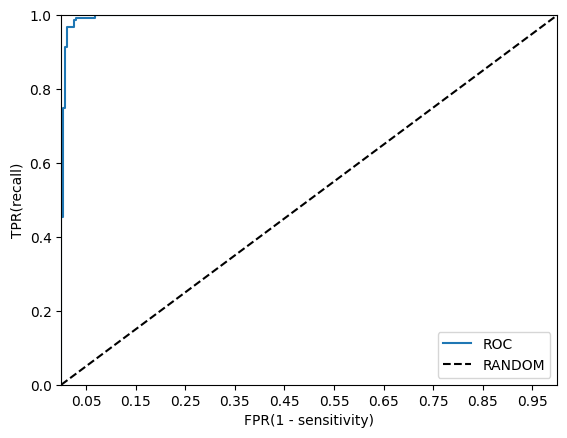

In [9]:
roc_curve_plot(y_test, lr_clf.predict_proba(titanic_test_trans)[:,1])    

In [10]:
from sklearn.metrics import roc_auc_score

pred_proba = lr_clf.predict_proba(titanic_test_trans)[:,1]
roc_score = roc_auc_score(y_test, pred_proba)
print(roc_score)

0.9958943411159479
